In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Titanic-Dataset.csv")

In [5]:
# -------------------------------
# 1. Data Inspection
# -------------------------------
print("Shape of dataset:", df.shape)


Shape of dataset: (891, 12)


In [11]:
print("Info:")
print(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [10]:
print("Description:")
print(df.describe())


Description:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [12]:
print("First 5 rows:")
print(df.head())


First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

In [13]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [16]:
# -------------------------------
# 2. Missing Values Handling
# -------------------------------
df['Age'].fillna(df['Age'].median())
df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Cabin_Available'] = df['Cabin'].notnull().astype(int)

/tmp/ipython-input-2846599589.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette=['red','green'])


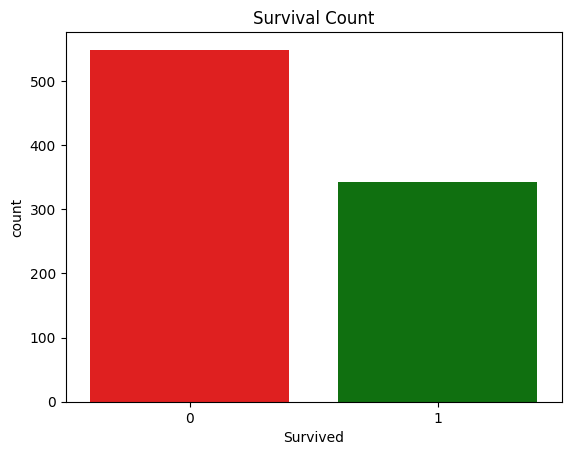

In [17]:
# -------------------------------
# 3. Univariate Analysis
# -------------------------------
sns.countplot(x='Survived', data=df, palette=['red','green'])
plt.title("Survival Count")
plt.show()

/tmp/ipython-input-3590447080.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette='Set2')


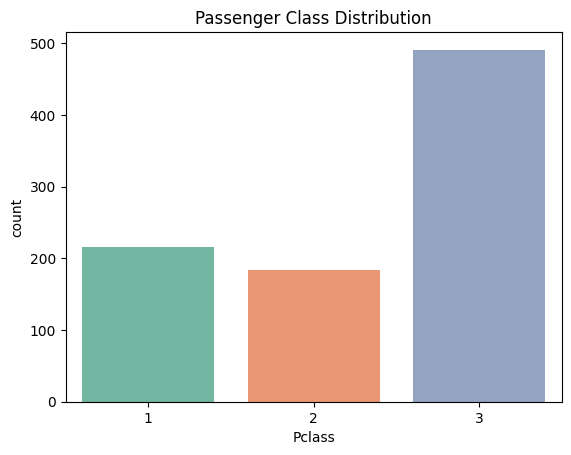

In [18]:
sns.countplot(x='Pclass', data=df, palette='Set2')
plt.title("Passenger Class Distribution")
plt.show()

/tmp/ipython-input-3894897469.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='pastel')


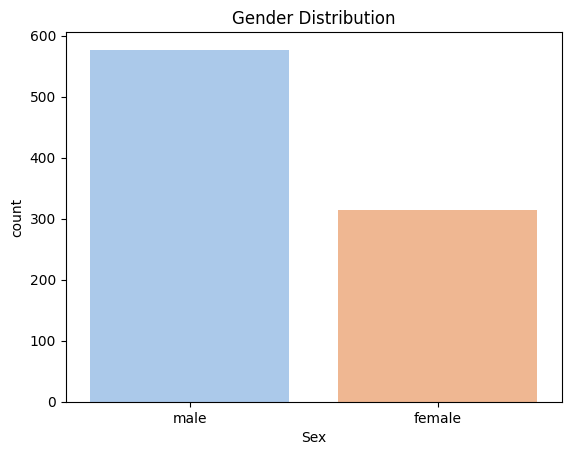

In [19]:
sns.countplot(x='Sex', data=df, palette='pastel')
plt.title("Gender Distribution")
plt.show()

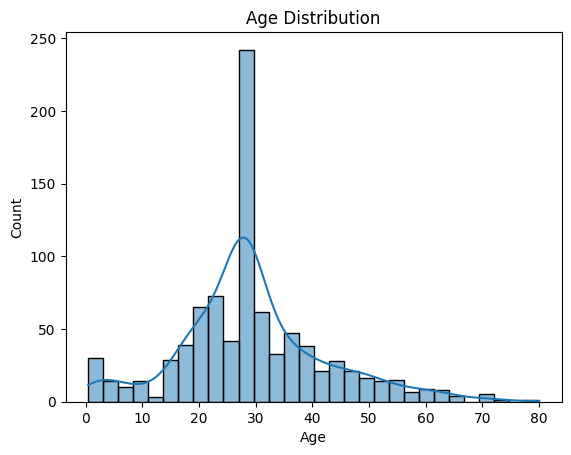

In [20]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

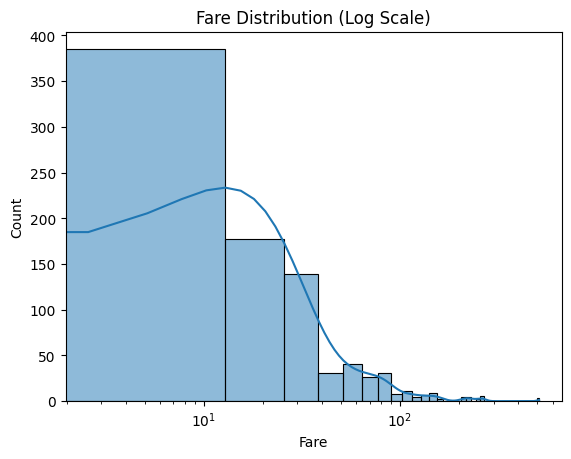

In [21]:
sns.histplot(df['Fare'], bins=40, kde=True)
plt.title("Fare Distribution (Log Scale)")
plt.xscale("log")
plt.show()


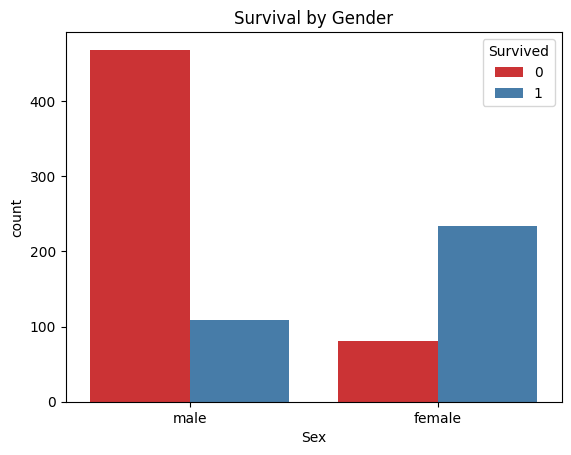

In [22]:
# -------------------------------
# 4. Bivariate Analysis
# -------------------------------
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set1')
plt.title("Survival by Gender")
plt.show()

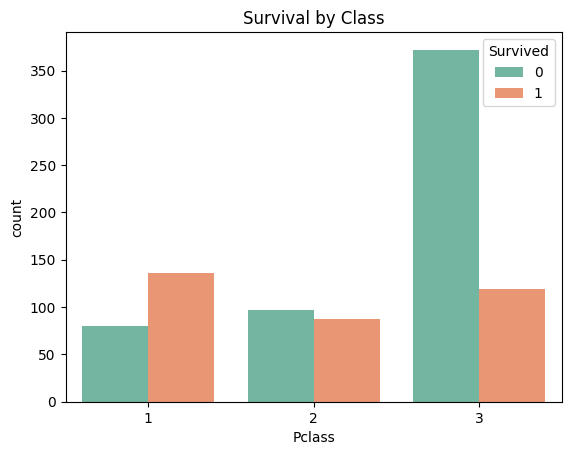

In [23]:
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set2')
plt.title("Survival by Class")
plt.show()

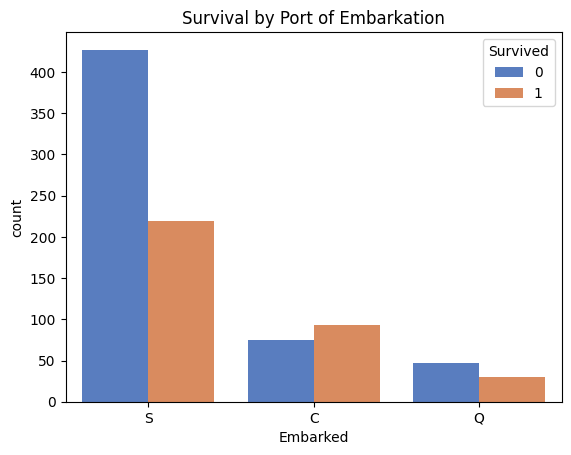

In [24]:
sns.countplot(x='Embarked', hue='Survived', data=df, palette='muted')
plt.title("Survival by Port of Embarkation")
plt.show()

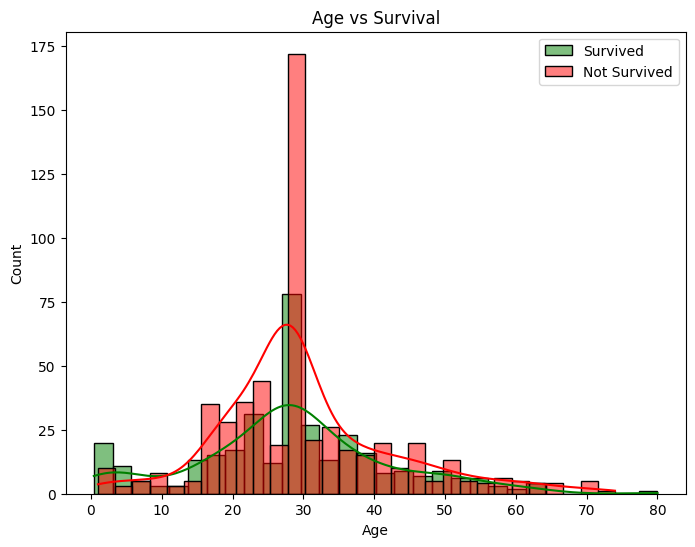

In [25]:

plt.figure(figsize=(8,6))
sns.histplot(df[df['Survived']==1]['Age'], bins=30, color='green', label='Survived', kde=True)
sns.histplot(df[df['Survived']==0]['Age'], bins=30, color='red', label='Not Survived', kde=True)
plt.legend()
plt.title("Age vs Survival")
plt.show()

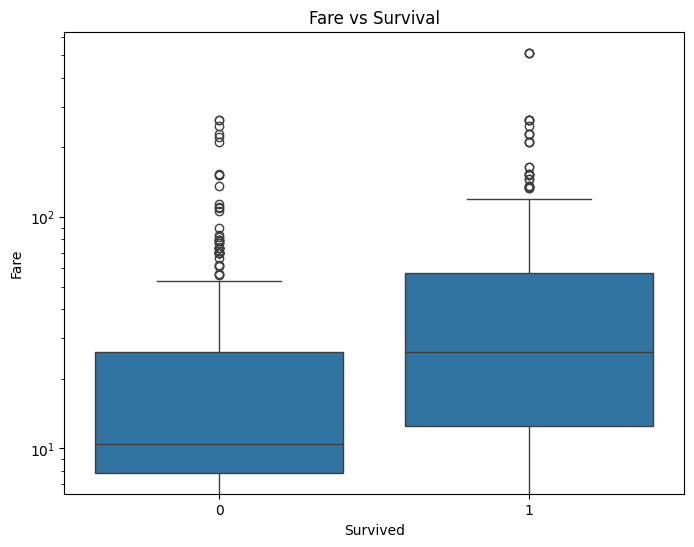

In [26]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare vs Survival")
plt.yscale("log")
plt.show()

In [27]:
# -------------------------------
# 5. Multivariate Analysis
# -------------------------------
df['Sex_encoded'] = df['Sex'].map({'male':0, 'female':1})
numeric_df = df.select_dtypes(include=['int64','float64'])
corr = numeric_df.corr()

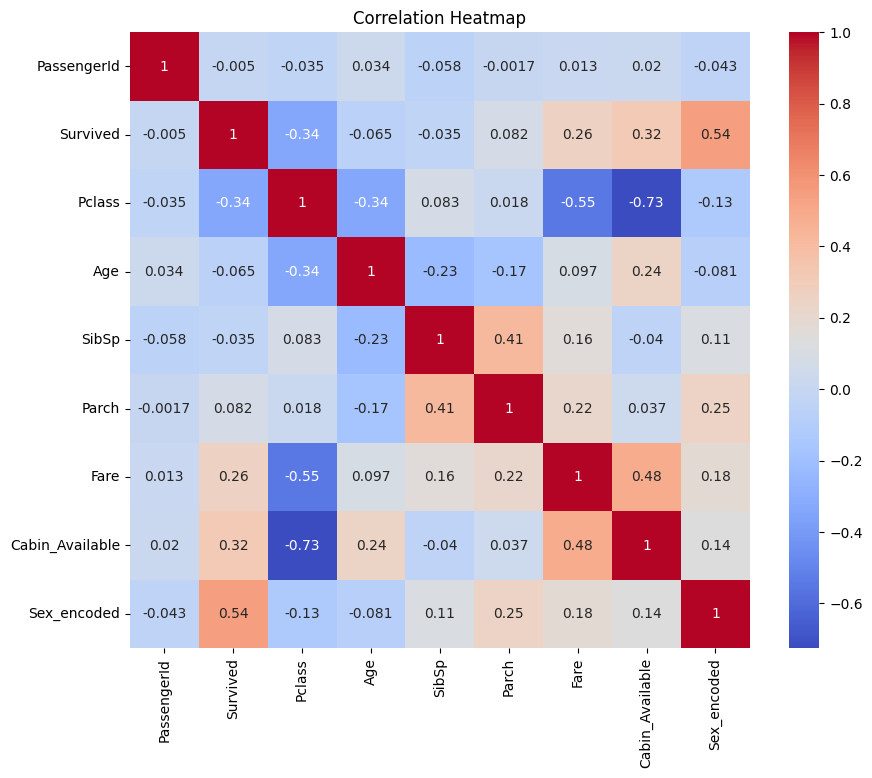

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

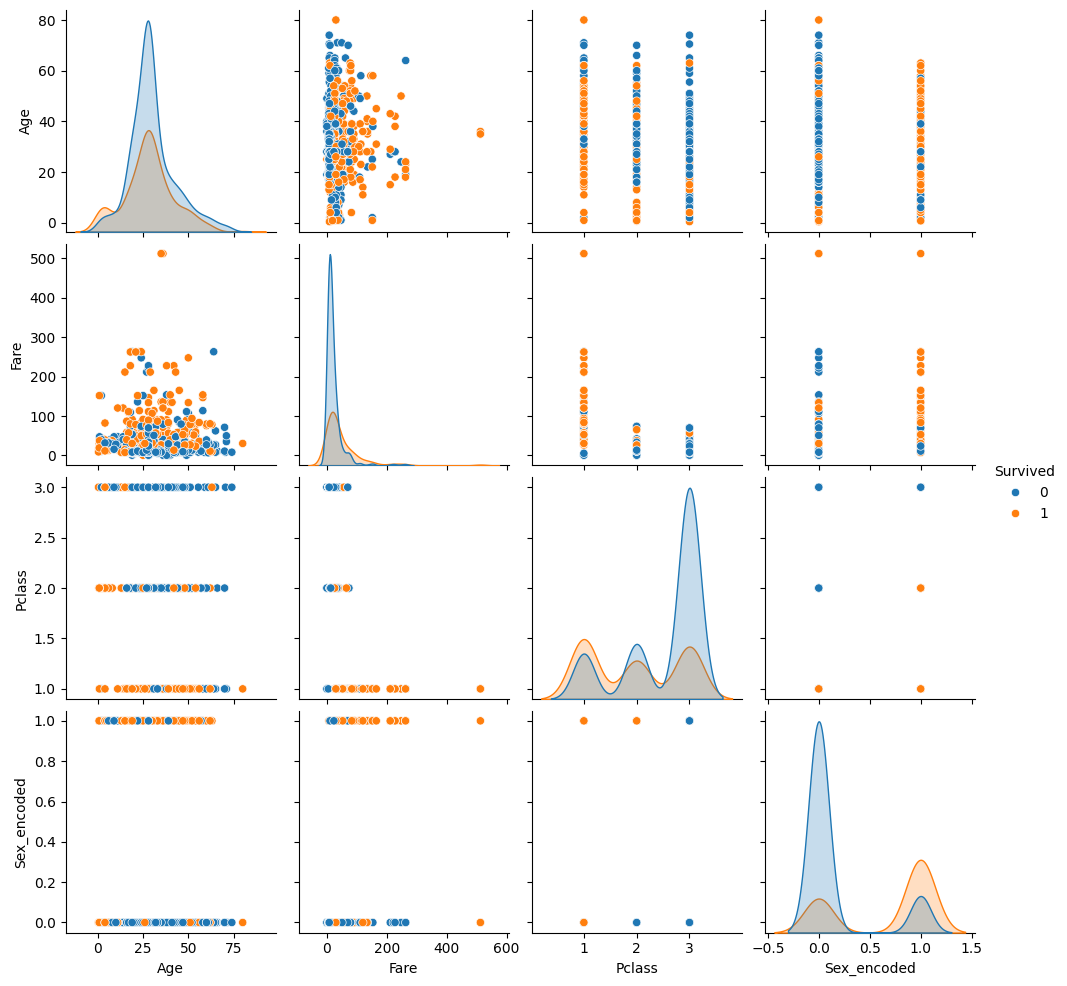

In [29]:
sns.pairplot(df[['Survived','Age','Fare','Pclass','Sex_encoded']], hue="Survived", diag_kind="kde")
plt.show()


In [31]:
# -------------------------------
# 6. Feature Engineering Basics
# -------------------------------
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\\.', expand=False)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

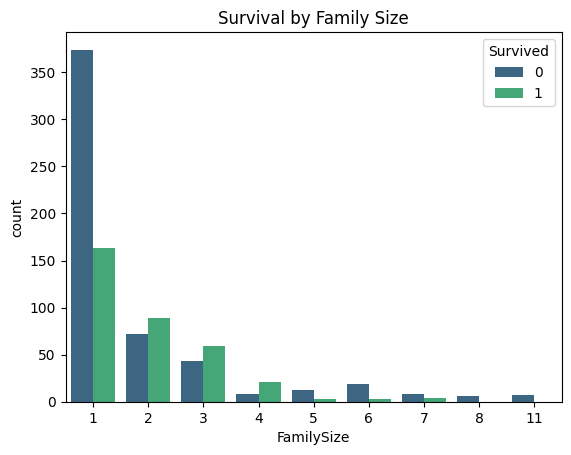

In [32]:
sns.countplot(x='FamilySize', hue='Survived', data=df, palette='viridis')
plt.title("Survival by Family Size")
plt.show()

In [33]:
print("\nEDA Completed Successfully ✅")


EDA Completed Successfully ✅
